## 🧂 Misc utils

In [ ]:
#| default_exp utils.misc

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()

In [ ]:
# |hide
from nbdev.showdoc import *


from lovely_jax import monkey_patch

In [ ]:
# |hide
monkey_patch()

In [ ]:
# |export

import re
import codecs
import numpy as np
import jax, jax.numpy as jnp

from fastcore.test import test_eq

In [ ]:
# |exporti
def to_numpy(t):
    # if t.dtype == jnp.bfloat16:
    return np.array(t, dtype=np.float32)
    # return t

In [ ]:
# |exporti
def is_cpu(t: jax.Array):
    return t.device() == jax.devices("cpu")[0]


In [ ]:
# |exporti

def test_array_repr(input: str, template:str):
    # Depending on the jax version, the arrray type can be either "Array" or "DeviceArray".
    # Depending on platform, the default device can be "cpu:0" or "gpu:0" (or, I guess, "tpu:0"?)

    # Create templace to match the "Array" and "gpu:0" case, they will be replaced with
    # regexes that will match either case

    # Escape the template to make it a valid regex.
     
    template = re.escape(template)
    template = template.replace("Array", "(Array|DeviceArray)")
    template = template.replace("gpu:0\\ ", "(cpu:0 |gpu:0 |tpu:0 )?")
    
    # Does imput match the regex?
    if not re.search(template, input):
        template = template.replace("\\", "")
        raise Exception(f"Template does not match\nTemplate: '{template}'\ninput:    '{input}'")
        

In [ ]:
test_array_repr("DeviceArray[2] μ=-0.466 σ=1.515 [-1.981, 1.048]",
                "Array[2] μ=-0.466 gpu:0 σ=1.515 [-1.981, 1.048]")

In [ ]:
bf16 = jnp.ones((10,10,3), dtype=jnp.bfloat16)
bf16

Array[10, 10, 3] bf16 n=300 x∈[1.000, 1.000] μ=1.000 σ=0. gpu:0

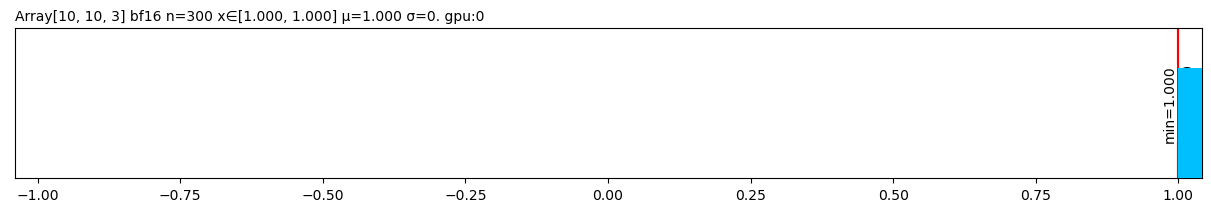

In [ ]:
bf16.plt

In [ ]:
bf16.rgb

In [ ]:
bf16.chans

In [ ]:
# key = jax.random.PRNGKey(0)

# cpu = jax.devices("cpu")[0]

# x1 = jax.device_put(jax.random.normal(key, (1024, 1024)), cpu)
# x2 = jax.device_put(jax.random.normal(key, (1024, 1024)), cpu)

# %timeit np.dot(np.array(x1), np.array(x2))